In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Electricity Data

In [2]:
# Read the electricity generation data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m12/lesson_1/datasets/electricity-generation.csv"
df_electricity = pd.read_csv(file_path)

# Display sample data
df_electricity.head()

,Year,Hydro,Thermal,Renewables,Total
0,2000,6610.0,614.0,0,7224
1,2001,6609.0,1250.0,0,7859
2,2002,5036.0,2237.0,0,7273
3,2003,3885.0,1996.0,0,5881
4,2004,5280.0,758.0,0,6038


<Axes: title={'center': 'Total electricity generation by year (GHz)'}, xlabel='Year', ylabel='Total'>

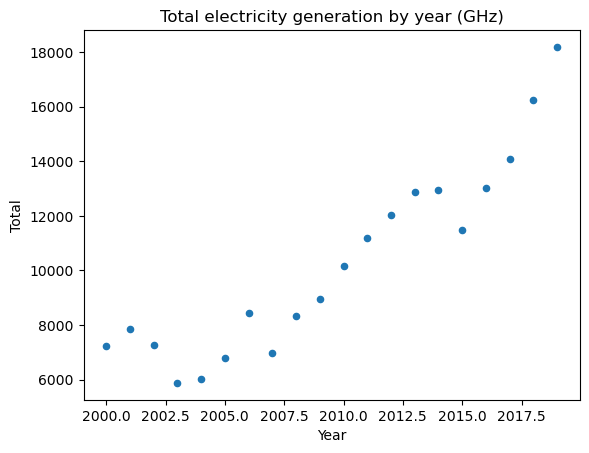

In [3]:
# Create a scatter plot with the total electricity generation by year
electricity_plot = df_electricity.plot.scatter(
    x="Year",
    y="Total",
    title="Total electricity generation by year (GHz)"
)
electricity_plot

In [4]:
# The first three years look like significant outliers.
# Reduce the DataFrame to just the "Year" and "Total" columns
# and only from 2003 onwards

df = pd.DataFrame(df_electricity.loc[df_electricity["Year"]>=2003,["Year","Total"]])\
        .reset_index().drop(columns="index")
df.head()

,Year,Total
0,2003,5881
1,2004,6038
2,2005,6788
3,2006,8430
4,2007,6978


## Prepare the Data to Fit the Linear Regression Model

In [6]:
# Create the X set
X = df.Year.values.reshape(-1,1)

# Display sample data
X

array([[2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [7]:
# Create an array for the dependent variable y with the total electricity generation data
y = df['Total']

## Build the Linear Regression Model

In [9]:
# Create a model with scikit-learn
model = LinearRegression()

In [10]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [11]:
# Display the slope
model.coef_

array([681.87990196])

In [12]:
# Display the y-intercept
model.intercept_

-1360458.3063725496

In [13]:
# Display the model's best fit line formula
print(f'Formula: y = {model.intercept_} + {model.coef_[0]}X')

Formula: y = -1360458.3063725496 + 681.8799019607845X


## Plot the Best Fit Line for the Electricity Generation Prediction Model

In [15]:
# Make predictions using the X set
preds = model.predict(X)

In [16]:
# Create a copy of the original data
df_preds = df.copy()

# Add a column with the predicted electricity values
df_preds['elect_preds'] = preds

# Display sample data
df_preds.head()

,Year,Total,elect_preds
0,2003,5881,5347.137255
1,2004,6038,6029.017157
2,2005,6788,6710.897059
3,2006,8430,7392.776961
4,2007,6978,8074.656863


<Axes: xlabel='Year'>

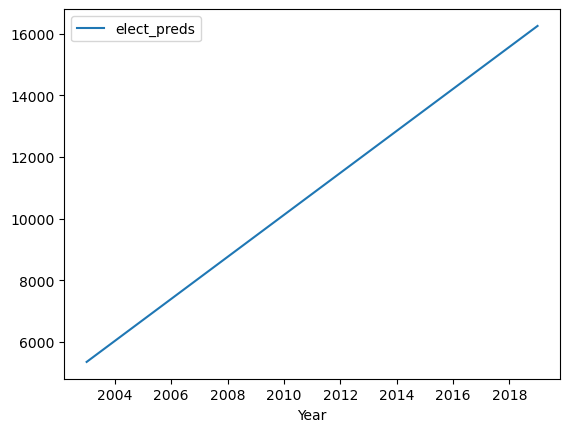

In [17]:
# Create a line plot of the predicted total electricity generation values
df_preds.plot.line(x="Year", y='elect_preds')

<Axes: title={'center': 'Electricity Generation by Year (GHz)'}, xlabel='Year', ylabel='Total'>

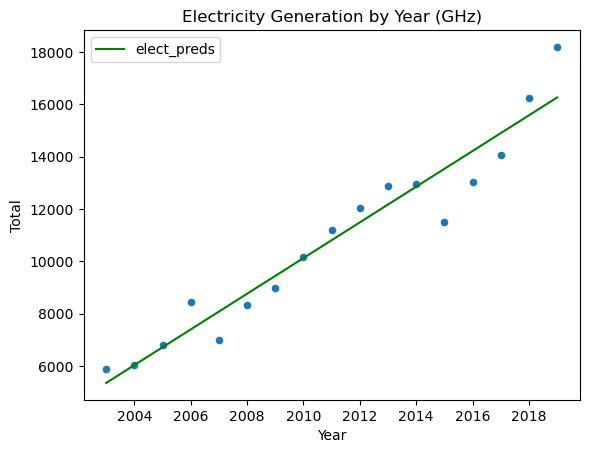

In [20]:
# Superpose the original data and the best fit line
# Create a scatter plot with the electricity information
elect_plot = df_preds.plot.scatter(x="Year", y='Total', title='Electricity Generation by Year (GHz)')

# Create a line plot of the predicted total electricity generation values
line = df_preds.plot.line(x="Year", y='elect_preds', color='green', ax=elect_plot)

elect_plot

## Make Manual Predictions

In [23]:
# Display the formula to predict the electricity generation for 2023
print(f"Model's formula: y = {model.intercept_}+ {model.coef_[0]} * 2023")

# Predict the electricity generation for 2023
pred_2023 = model.intercept_ + model.coef_[0]*2023

# Display the prediction
print(f"Predicted Electricity generation for 2023: {pred_2023:.2f}")

Model's formula: y = -1360458.3063725496+ 681.8799019607845 * 2023
Predicted Electricity generation for 2023: 18984.74


## Make Predictions Using the `predict` Function

In [24]:
# Create an array to predict electricity generation for the years 2020, 2021, 2022, and 2023
X_years = np.array([2020, 2021, 2022, 2023])

# Format the array as a one-column array
X_years = X_years.reshape(-1,1)

# Display sample data
X_years

array([[2020],
       [2021],
       [2022],
       [2023]])

In [25]:
# Predict electricity generation for the years 2020, 2021, 2022, and 2023
predicted_electricity = model.predict(X_years)

In [27]:
X_years.reshape(1, -1)[0]

array([2020, 2021, 2022, 2023])

In [28]:
# Create a DataFrame for the predicted electricity generation
df_preds = pd.DataFrame({"Year" : X_years.reshape(1, -1)[0], 'predicted_electricity' : predicted_electricity})

# Display data
df_preds

,Year,predicted_electricity
0,2020,16939.095588
1,2021,17620.975490
2,2022,18302.855392
3,2023,18984.735294


## Linear Regression Model Assessment

In [31]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
predicted_electricity

array([16939.09558824, 17620.9754902 , 18302.85539216, 18984.73529412])

In [34]:
# Compute the metrics for the linear regression model
score = round(model.score(X, y), 5)
r2 = round(r2_score(y, preds), 5)
mse = round(mean_squared_error(y, preds), 5) 
rmse = round(np.sqrt(mse))

# Print relevant metrics.
print(score)
print(r2)
print(mse)
print(rmse)

0.92953
0.92953
845942.1521
920
